## Problem 1 & 2

In [1]:
import numpy as np
import scipy as sy
from numpy import linalg as la
from random import randint
from matplotlib import pyplot as plt

In [5]:
def Jacobi(A, b, tol, maxiters, plot=False):
    if np.any(np.diag(A) == 0):
        raise ValueError("A can't have a 0 in it's diagonal")
    x = np.zeros(len(b))
    i = 0
    dist = 10000
    abs_error = []
    while dist > tol and i < maxiters:
        xp1 = x + (b - A @ x) / A.diagonal() 
        dist = la.norm(x - xp1 , np.inf)
        abs_error.append(dist)
        x = xp1
        i += 1
        
    if plot:
        plt.figure(figsize=(8, 5))
        plt.semilogy(np.arange(i), abs_error)
        plt.title("Convergence of Jacobi Method")
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration")
        plt.show()
    return x

In [6]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A


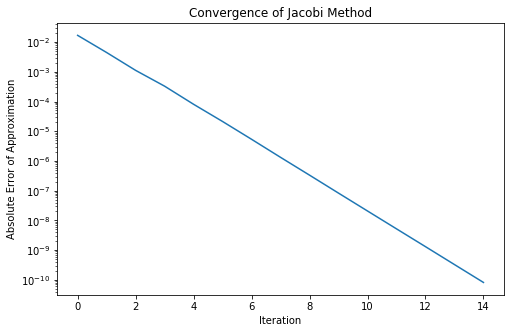

In [9]:
n = randint(1000, 5000)
b = np.random.random(n)    
A = diag_dom(n)
x = Jacobi(A, b, 1e-10, 1000, True)

In [10]:
print(np.allclose(A @ x, b, atol = 1e-6))
print(n)

True
2797


## Problem 3

In [11]:
def Gauss_Seidel(A, b, tol=1e-6, maxiters=100, plot=False):
    if np.any(np.diag(A) == 0):
        raise ValueError("A can't have a 0 in it's diagonal")
    xk = np.zeros(len(b))
    i = 0
    dist = 10000
    abs_error = []
    while dist > tol and i < maxiters:
        xk_copy = np.copy(xk)
        xp1 = np.array([xk[i] + (1 / A[i, i]) * (b[i] - A[i] @ xk) for i in range(len(xk))])
        dist = la.norm(xk_copy - xp1 , np.inf)
        abs_error.append(dist)
        xk = xp1
        i += 1
    if plot:
        plt.figure(figsize=(8, 5))
        plt.semilogy(np.arange(i), abs_error)
        plt.title("Convergence of Gauss Seidel Method")
        plt.ylabel("Absolute Error of Approximation")
        plt.xlabel("Iteration")
        plt.show()
    return xk

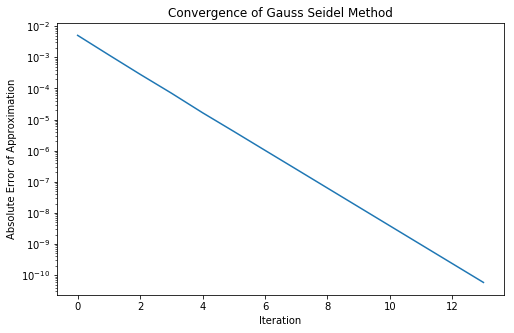

In [12]:
n2 = randint(10000, 20000)
b2 = np.random.random(n2)    
A2 = diag_dom(n2)
x2= Gauss_Seidel(A2, b2, 1e-10, 1000, True)

In [13]:
print(np.allclose(A2 @ x2, b2, atol = 1e-6))
print(n2)

True
18772


## Problem 4

In [14]:
from scipy import sparse

In [18]:
def Gauss_Seidel_sparse(A, b, tol=1e-6, maxiters=100):
    xk = np.zeros(len(b))
    xkp1 = np.zeros(len(b))
    i = 0
    dist = 10000
    abs_error = []
    while dist > tol and i < maxiters:
        xk_copy = np.copy(xk)
        for j in range(len(b)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            xkp1[j] = xk[j] + (1 / A[j, j]) * (b[j] - Aix) 
        dist = la.norm(xk_copy - xkp1 , np.inf)
        abs_error.append(dist)
        xk = xkp1
        i += 1
    return xk


In [19]:
A3 = sparse.csr_matrix(diag_dom(5000))
b3 = np.random.random(5000)
A3.shape
x3 = Gauss_Seidel_sparse(A3, b3, 1e-10, 100)

In [20]:
print(np.allclose(A3 @ x3, b3, atol = 1e-6))

True


## Problem 5

In [27]:
def SOR(A, b, omega, tol=1e-6, maxiters= 100):
    xk = np.zeros(len(b))
    xkp1 = np.zeros(len(b))
    i = 0
    dist = 10000
    abs_error = []
    while dist > tol and i < maxiters:
        xk_copy = np.copy(xk)
        for j in range(len(b)):
            # Get the indices of where the i-th row of A starts and ends if the
            # nonzero entries of A were flattened.
            rowstart = A.indptr[j]
            rowend = A.indptr[j+1]
            # Multiply only the nonzero elements of the i-th row of A with the
            # corresponding elements of x.
            Aix = A.data[rowstart:rowend] @ xk[A.indices[rowstart:rowend]]
            xkp1[j] = xk[j] + (omega / A[j, j]) * (b[j] - Aix) 
        dist = la.norm(xk_copy - xkp1 , np.inf)
        abs_error.append(dist)
        xk = xkp1
        i += 1
    return xk, i


In [28]:
A4 = sparse.csr_matrix(diag_dom(50000))
b4 = np.random.random(50000)
x4, i = Gauss_Seidel_sparse(A4, b4, 1e-8, 100)

ValueError: too many values to unpack (expected 2)

In [ ]:
print(np.allclose(A4 @ x4, b4, atol = 1e-6))
print("Iterations: ", i)

## Problem 6

In [ ]:
def hotplate(n, omega, tol=1e-8, maxiter=100, plot=False):
    A = sparse.csr_matrix(diag_dom(n))
    b = np.tile(b, n)
    return u, i
